# バックテスト検証ノート

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [3]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [4]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [5]:
bt = Backtesting(timestamp)

In [6]:
df_cc = bt.get_coincheck_df()
df_lq = bt.get_liquid_df()

In [7]:
len(df_cc), len(df_lq)

(10660, 10660)

## テスト実行

In [8]:
bt.run()

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2020-05-07 07:14:27,coincheck,liquid,BTC/JPY,0.006,6
1,2020-05-07 07:49:47,liquid,coincheck,BTC/JPY,0.006,1
2,2020-05-07 07:52:00,coincheck,liquid,BTC/JPY,0.006,9
3,2020-05-07 07:52:12,liquid,coincheck,BTC/JPY,0.006,-1
4,2020-05-07 07:52:27,coincheck,liquid,BTC/JPY,0.006,7
5,2020-05-07 07:52:50,liquid,coincheck,BTC/JPY,0.006,0
6,2020-05-07 07:53:29,coincheck,liquid,BTC/JPY,0.006,6
7,2020-05-07 07:53:55,liquid,coincheck,BTC/JPY,0.006,0
8,2020-05-07 07:54:23,coincheck,liquid,BTC/JPY,0.006,6
9,2020-05-07 08:05:15,liquid,coincheck,BTC/JPY,0.006,0


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2020-05-07 07:14:27,coincheck,買い,989724
1,2020-05-07 07:14:27,liquid,売り,990737
2,2020-05-07 07:49:47,liquid,買い,992074
3,2020-05-07 07:49:47,coincheck,売り,992246
4,2020-05-07 07:52:00,coincheck,買い,994889
5,2020-05-07 07:52:00,liquid,売り,996537
6,2020-05-07 07:52:12,liquid,買い,995466
7,2020-05-07 07:52:12,coincheck,売り,995259
8,2020-05-07 07:52:27,coincheck,買い,994308
9,2020-05-07 07:52:27,liquid,売り,995477


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
-------------------  -------------------
         レコード数                10660
           取引回数                   10
           開始日時  2020-05-07 07:05:55
           終了日時  2020-05-07 08:08:24
        取引時間[H]      0 days 01:02:29
      取引単位[BTC]                0.006
  利確しきい値[JPY]                 1000
損切りマージン[JPY]                 1000
-------------------  -------------------

バックテスト結果
-----------  -------
開始[JPY]      10000
終了[JPY]      10035
利益[JPY]         35
開始[BTC]      0.022
終了[BTC]      0.022
利益[BTC]          0
開始[TOTAL]  31784.8
終了[TOTAL]  31820.7
利益[TOTAL]   35.862
-----------  -------


## グラフ出力

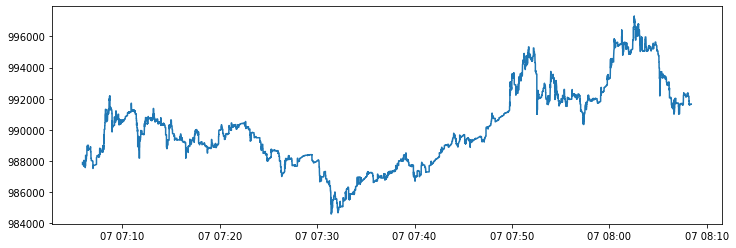

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_cc.index, df_cc['bid'])

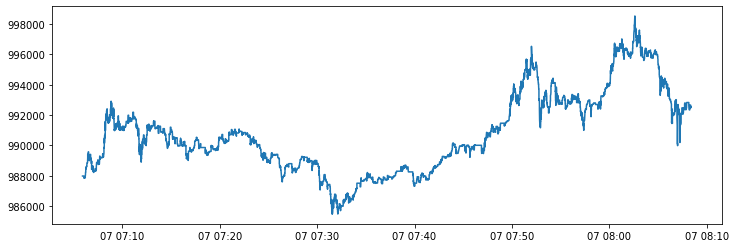

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_lq.index, df_lq['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_cc.index),
    "buy_coincheck_sell_liquid": df_lq.reset_index().bid - df_cc.reset_index().ask,
    "buy_liquid_sell_coincheck": df_cc.reset_index().bid - df_lq.reset_index().ask,
    'coincheck_bid': df_cc.reset_index().bid,
     'liquid_ask': df_lq.reset_index().ask,
    'liquid_bid': df_lq.reset_index().bid,
    'coincheck_ask': df_cc.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_coincheck_sell_liquid,buy_liquid_sell_coincheck,coincheck_bid,liquid_ask,liquid_bid,coincheck_ask
timestamp,,,,,,
2020-05-07 07:00:00,229,-794,989427,990220,990021,989791
2020-05-07 07:10:00,268,-812,989862,990674,990499,990231
2020-05-07 07:20:00,286,-807,988908,989715,989580,989294
2020-05-07 07:30:00,327,-826,986791,987616,987490,987163
2020-05-07 07:40:00,107,-563,989270,989834,989727,989621
2020-05-07 07:50:00,356,-897,992588,993485,993330,992975
2020-05-07 08:00:00,319,-943,994176,995119,994928,994608
